## TASK1

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pt
from sklearn.model_selection import train_test_split
from models.five_fold_validation import k_fold_validation

In [29]:
wine = pd.read_csv("data/winequality/winequality-red.csv", sep=";")
cancer = pd.read_csv("data/breastcancer/breast-cancer-wisconsin.data", delimiter=",")
wine.head()
cancer.head()

,id,thickness,cell_size,cell_shape,adhesion,e_cell_size,bare_nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 1.2 (a) for completions sake, reading it into numpy array. 

In [30]:
wine_np = np.genfromtxt("data/winequality/winequality-red.csv", delimiter=";") 
wine_np

array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [31]:
# for completions sake, reading it into numpy array.
cancer_np = np.genfromtxt("data/winequality/winequality-red.csv", delimiter=";") 
cancer_np

array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

### 1.2 (b) convert wine data and cancer data to binary

In [32]:
total_row_count = wine.shape[0]
wine['classified'] = [1 if x>=6 else 0 for x in wine["quality"] ]

## test conversion, total should equal 0s and 1s
total_row_count == wine[wine.classified==1].shape[0] + wine[wine.classified==0].shape[0]

True

In [33]:
## malignant is 1,  benign is 0
cancer['classified'] = [1 if x == 4 else 0 for x in cancer["class"]]

### 1.3 missing or malinformed features

In [34]:
# check for anything thats not an int or a float
wine_columns_invalid = wine.applymap(lambda x: not isinstance(x, (int, float))).any()
wine_columns_invalid.any()

False

In [35]:
cancer_columns_invalid = cancer.applymap(lambda x: not isinstance(x, (int, float))).any()
cancer_columns_invalid.any()

True

In [36]:
## check for the faulty column
cancer_columns_invalid

id             False
thickness      False
cell_size      False
cell_shape     False
adhesion       False
e_cell_size    False
bare_nuclei     True
chromatin      False
nucleoli       False
mitosis        False
class          False
classified     False
dtype: bool

In [37]:
cancer.bare_nuclei.apply(lambda x: type(x))

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
694    <class 'str'>
695    <class 'str'>
696    <class 'str'>
697    <class 'str'>
698    <class 'str'>
Name: bare_nuclei, Length: 699, dtype: object

In [38]:
cancer[cancer.bare_nuclei == "?"].shape[0]

16

In [39]:
## TODO: add fill in the values from context
# remove entries where cancer.bare_nuclie == ? and convert the column to int
cancer = cancer[cancer.bare_nuclei != "?"]
cancer.bare_nuclei = pd.to_numeric(cancer.bare_nuclei)

In [40]:
## run the checks again, should be false
cancer_columns_invalid = cancer.applymap(lambda x: not isinstance(x, (int, float))).any()
cancer_columns_invalid.any()

False

### 1.4 Compute statistics for the data

In [41]:
wine_X = np.array(wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])
wine_y = np.array(wine[['classified']])

In [42]:
cancer_X = np.array(cancer[['thickness', 'cell_size', 'cell_shape', 'adhesion', 'e_cell_size',
       'bare_nuclei', 'chromatin', 'nucleoli', 'mitosis']])
cancer_y = np.array(cancer[["classified"]])

##### wine data

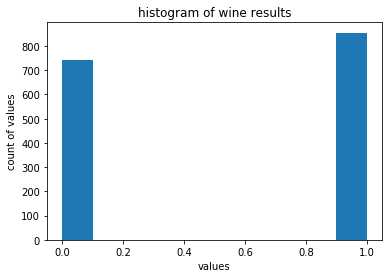

In [43]:
pt.hist(wine.classified)
pt.ylabel("count of values")
pt.xlabel("values")
pt.title('histogram of wine results')
pt.show()


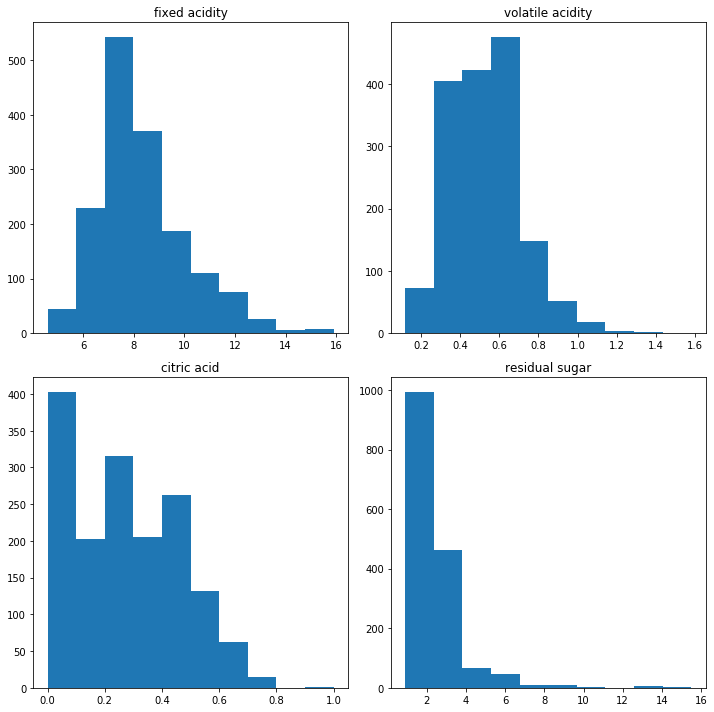

In [44]:
fig, axs = pt.subplots(2, 2, figsize=(10,10))
axs[0, 0].hist(wine['fixed acidity'])
axs[0, 0].set_title('fixed acidity')
axs[0, 1].hist(wine['volatile acidity'])
axs[0, 1].set_title('volatile acidity')
axs[1, 0].hist(wine['citric acid'])
axs[1, 0].set_title('citric acid')
axs[1, 1].hist(wine['residual sugar'])
axs[1, 1].set_title('residual sugar')
fig.tight_layout()
pt.show()

#### cancer data

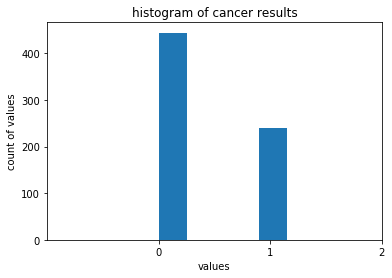

In [45]:
bins = np.arange(3)-0.5
pt.hist(cancer.classified, width=0.25, align='mid')
pt.ylabel("count of values")
pt.xlabel("values")
pt.title('histogram of cancer results')
pt.xticks(range(3))
pt.xlim([-1, 2])
pt.show()

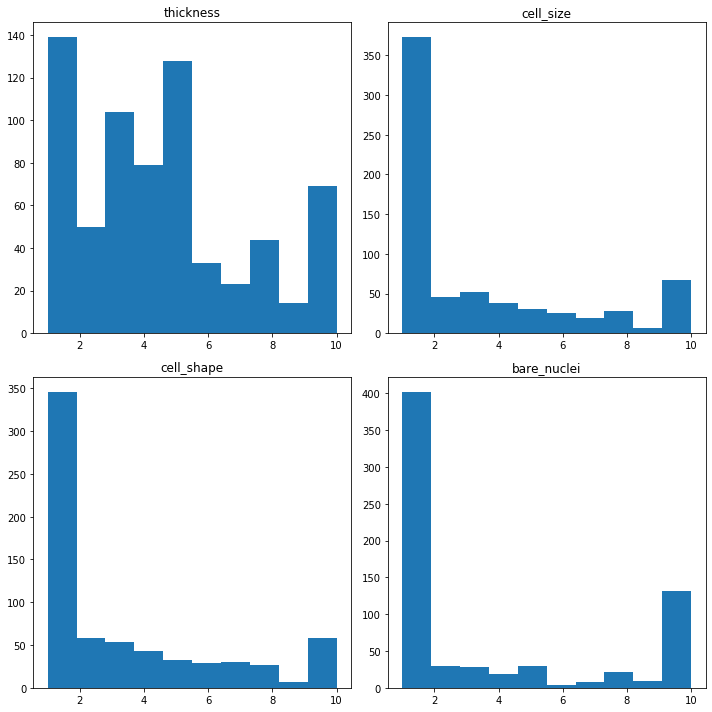

In [46]:
fig, axs = pt.subplots(2, 2, figsize=(10,10))
axs[0, 0].hist(cancer['thickness'])
axs[0, 0].set_title('thickness')
axs[0, 1].hist(cancer['cell_size'])
axs[0, 1].set_title('cell_size')
axs[1, 0].hist(cancer['cell_shape'])
axs[1, 0].set_title('cell_shape')
axs[1, 1].hist(cancer['bare_nuclei'])
axs[1, 1].set_title('bare_nuclei')
fig.tight_layout()
pt.show()

## TASK 2

In [47]:
wine_X = np.array(wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])
wine_y = np.array(wine[['classified']])

In [48]:
cancer_X = np.array(cancer[['thickness', 'cell_size', 'cell_shape', 'adhesion', 'e_cell_size',
       'bare_nuclei', 'chromatin', 'nucleoli', 'mitosis']])
cancer_y = np.array(cancer[["classified"]])

In [49]:
from sklearn.model_selection import train_test_split

#### Logistic Regression

###### wine data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.20)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
wine_model=LogisticRegression(solver="lbfgs", max_iter=1000)
wine_model.fit(X_train, y_train)
y_predicted = wine_model.predict(X_test)
wine_model.score(X_test, y_test)

/Users/faizank/Documents/courses/comp551/mini_project1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75625

In [53]:
from models.logistic_regression import LogisticRegression as CustomLogisticRegression

In [103]:
custom_wine_model = CustomLogisticRegression(0.00001, 100)
custom_wine_model.fit(X_train, y_train)
custom_y_predicted = custom_wine_model.predict(X_test)

starting model training with learning_rate =  1e-05 and num of iterations  100
model trained with params [-0.10984422  0.1034986   0.07951772  0.03232871 -0.07745253  0.13648571
 -0.04847358  0.07049077 -0.05535661]


In [104]:
custom_wine_model.score(X_test, y_test)[0]

0.781021897810219

###### cancer data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size=0.20)

In [57]:
cancer_model = LogisticRegression(solver="lbfgs", max_iter=1000)
cancer_model.fit(X_train, y_train)
y_predicted = cancer_model.predict(X_test)
cancer_model.score(X_test, y_test)

/Users/faizank/Documents/courses/comp551/mini_project1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.948905109489051

In [58]:
custom_cancer_model = CustomLogisticRegression(0.001, 100)
custom_cancer_model.fit(X_train, y_train)
custom_y_predicted = custom_cancer_model.predict(X_test)

starting model training with learning_rate =  0.001 and num of iterations  100
model trained with params [-1.01094746  1.72888061  0.69645619  0.21356023 -1.79307235  1.11872099
 -1.10023573  0.65987917 -0.49171299]


In [59]:
custom_cancer_model.score(X_test, y_test)[0]

0.8686131386861314

#### Linear Discriminant Analysis

###### wine data

In [85]:
X_train, X_test, y_train, y_test = train_test_split(wine_X, wine_y, test_size=0.20)

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [87]:
wine_model= LinearDiscriminantAnalysis()
wine_model.fit(X_train, y_train)
y_predicted = wine_model.predict(X_test)
wine_model.score(X_test, y_test)

/Users/faizank/Documents/courses/comp551/mini_project1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7375

In [88]:
from models.linear_discriminant_analysis import LearnDiscriminantAnalysis as LDA

In [90]:
custom_wine_model = LDA()
custom_wine_model.fit(X_train, y_train)

model trained


In [91]:
custom_wine_model.score(X_test, y_test)[0]

0.7375

###### cancer data

In [92]:
X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size=0.20)

In [93]:
cancer_model = LinearDiscriminantAnalysis()
cancer_model.fit(X_train, y_train)
y_predicted = cancer_model.predict(X_test)
cancer_model.score(X_test, y_test)

/Users/faizank/Documents/courses/comp551/mini_project1/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.948905109489051

In [94]:
custom_cancer_model = LDA()
custom_cancer_model.fit(X_train, y_train)
custom_y_predicted = custom_cancer_model.predict(X_test)

model trained


In [95]:
custom_cancer_model.score(X_test, y_test)[0]

0.948905109489051

#### K-fold cross validation

#### Standard Logistic Regression

In [100]:
wine_model = LogisticRegression(solver="lbfgs", max_iter=1000)
k_fold_validation(wine_X, wine_y.reshape(len(wine_y),), wine_model,5)

score: 0.690625
time: 0.2380809783935547


0.690625

In [99]:
cancer_model = LogisticRegression(solver="lbfgs", max_iter=1000)
k_fold_validation(cancer_X, cancer_y.reshape(len(cancer_y),), cancer_model,5)

score: 0.9343065693430657
time: 0.015357732772827148


0.9343065693430657

#### Custom Logistic Regression

In [115]:
from models.logistic_regression import LogisticRegression as LR

In [116]:
learnrate, max_iter = 0.0001, 100
wine_custom_model = LR( learnrate, max_iter)
k_fold_validation(wine_X, wine_y, wine_custom_model,5)

starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [ 0.57880734 -0.36563107  0.22100356  0.0665872  -0.0208899   3.77288194
 -3.51405442 -0.00778869 -0.03906735  0.30659872  2.3954086 ]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [ 0.15022371 -0.36315253  0.16358271  0.02921143 -0.03554997  3.32794655
 -3.79466667 -0.02747877 -0.07962077  0.21094191  2.14027672]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [ 1.62858341 -0.29157234  0.20229674  0.30498843 -0.02622883  4.08146455
 -1.22853453  0.08550671  0.2762326   0.3289285   3.23846645]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [ 0.83179488 -0.30052124  0.19026713  0.37421565 -0.01751782  2.40377939
 -1.66383709 -0.00952078 -0.03395183  0.25552434  1.97693448]
starting model training with learnin

array([0.3875])

In [117]:
cancer_custom_model = LR(learnrate, max_iter)
k_fold_validation(cancer_X, cancer_y, cancer_custom_model, 5)

starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.40252287  0.48486982  0.26855285  0.12798566 -0.5851789   0.48253749
 -0.25857099  0.23760149 -0.27854239]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.34497068  0.43298706  0.23561769  0.08404434 -0.47399206  0.3872104
 -0.24861692  0.29036355 -0.19720276]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.34884959  0.47036658  0.29612595  0.09051158 -0.41851098  0.35346466
 -0.3170787   0.24136968 -0.16019725]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.24259122  0.47575784  0.24105813  0.13541297 -0.434275    0.3895818
 -0.42556181  0.2322706  -0.17016326]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.25561857  0.3805795   0.

array([0.7810219])

#### Standard LDA

In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [119]:
wine_model = LinearDiscriminantAnalysis()
k_fold_validation(wine_X, wine_y.reshape(len(wine_y),), wine_model,5)

score: 0.69375
time: 0.008784294128417969


0.69375

In [120]:
cancer_model = LinearDiscriminantAnalysis()
k_fold_validation(cancer_X, cancer_y.reshape(len(cancer_y),), cancer_model,5)

score: 0.8905109489051095
time: 0.00430607795715332


0.8905109489051095

#### Custom LDA

In [79]:
from models.linear_discriminant_analysis import LearnDiscriminantAnalysis as LDA

In [80]:
wine_custom_lda = LDA()
k_fold_validation(wine_X, wine_y, wine_custom_lda,5)

model trained
model trained
model trained
model trained
model trained
score: [0.69375]
time: 0.06235694885253906


array([0.69375])

In [81]:
cancer_custom_model = LDA()
k_fold_validation(cancer_X, cancer_y, cancer_custom_model, 5)

model trained
model trained
model trained
model trained
model trained
score: [0.89051095]
time: 0.03140997886657715


array([0.89051095])

## TASK 3

### experiment with different learning rates, runtime and accuracy for Logistic regression

In [122]:
#do runtime measurements
lr = [0.1, 0.01, 0.001, 0.0001, 0.00001]
n_iter = 300

In [123]:
for learn in lr:
    print("accuracy of learning rate " + str(learn) + ": ")
    wine_custom_model = LR(learn, n_iter)
    k_fold_validation(wine_X, wine_y, wine_custom_model,5)
    print("")


accuracy of learning rate 0.1: 
starting model training with learning_rate =  0.1 and num of iterations  300
model trained with params [  -81.41164614 -1278.87633125   659.17546804  -370.36087741
   -81.03362504  3962.97509646 -3503.1344365   -349.73833589
 -1273.77059922   713.84308198  3101.61930208]
starting model training with learning_rate =  0.1 and num of iterations  300
model trained with params [ -764.27980944 -1154.84359609   459.99702224  -299.46869531
  -119.39094312  4971.31261907 -1254.483898    -263.05015047
  -881.86295813   551.72624194  3839.83943801]
starting model training with learning_rate =  0.1 and num of iterations  300
model trained with params [ 1034.37667684 -1157.00227092   524.18427467  -147.43197824
  -117.79998809  4695.89954972 -1242.31039978  -271.48083872
  -972.58673939   693.88560451  3662.2212854 ]
starting model training with learning_rate =  0.1 and num of iterations  300
model trained with params [  607.72055329 -1019.37893418   521.13944363   5

In [124]:
for learn in lr:
    print("accuracy of learning rate " + str(learn) + ": ")
    cancer_custom_model = LR(learnrate, max_iter)
    k_fold_validation(cancer_X, cancer_y, cancer_custom_model, 5)
    print("")

accuracy of learning rate 0.1: 
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.40252287  0.48486982  0.26855285  0.12798566 -0.5851789   0.48253749
 -0.25857099  0.23760149 -0.27854239]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.34497068  0.43298706  0.23561769  0.08404434 -0.47399206  0.3872104
 -0.24861692  0.29036355 -0.19720276]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.34884959  0.47036658  0.29612595  0.09051158 -0.41851098  0.35346466
 -0.3170787   0.24136968 -0.16019725]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with params [-0.24259122  0.47575784  0.24105813  0.13541297 -0.434275    0.3895818
 -0.42556181  0.2322706  -0.17016326]
starting model training with learning_rate =  0.0001 and num of iterations  100
model trained with par

### runtime and accuracy for Logistic Regression vs LDA, done in k-fold validation section